# In this notebook we visualize effects of inserting promoters

In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io
import akita_utils
import matplotlib.pyplot as plt
import glob
import seaborn as sns
# sns.set_theme()
import akita_utils.format_io

# Importing scores from simulations

In [2]:
def load_data(h5_dirs, scd_stats):
    
    dfs = []
    for h5_file in glob.glob(h5_dirs):
        dfs.append(akita_utils.format_io.h5_to_df(h5_file, scd_stats, drop_duplicates_key=None))    
    dfs = pd.concat(dfs)

    for stat in scd_stats:
        # for model in models:
        dfs[f"mean_{stat}_score"] = (dfs[f"{stat}_h1_m1_t0"]+dfs[f"{stat}_h1_m1_t1"]+dfs[f"{stat}_h1_m1_t2"]+dfs[f"{stat}_h1_m1_t3"]+dfs[f"{stat}_h1_m1_t4"]+dfs[f"{stat}_h1_m1_t5"])/6
    
    return dfs.reset_index(drop=True)

In [3]:
enhancers_alone_h5_dirs = "/scratch1/kamulege/insert_experiments/Enhancers_alone/*/*.h5" # 
promoters_alone_h5_dirs = "/scratch1/kamulege/insert_experiments/all_promoters/*/*.h5" #
promoter_enhancer_h5_dirs = "/scratch1/kamulege/insert_experiments/promoter_enhancer_zero_motifs/*/*.h5"
ctcfs_alone_h5_dirs = "/scratch1/kamulege/insert_experiments/ctcfs_alone_v2/*/*.h5" 
boundary_enhancer_h5_dirs = "/scratch1/kamulege/insert_experiments/boundary_enhancer/*/*.h5"
boundary_promoter_h5_dirs = "/scratch1/kamulege/insert_experiments/boundary_promoter/*/*.h5"
# boundary_promoter_enhancer_h5_dirs = "/scratch1/kamulege/insert_experiments/boundary_promoter_enhancer/*/*.h5"
scd_stats = ["SCD"]


enhancers_alone_df = load_data(enhancers_alone_h5_dirs, scd_stats)
promoters_alone_df = load_data(promoters_alone_h5_dirs, scd_stats)
promoter_enhancer_df = load_data(promoter_enhancer_h5_dirs, scd_stats)
ctcfs_alone_df = load_data(ctcfs_alone_h5_dirs, scd_stats)
boundary_enhancer_df = load_data(boundary_enhancer_h5_dirs, scd_stats)
boundary_promoter_df = load_data(boundary_promoter_h5_dirs, scd_stats)
# boundary_promoter_enhancer_df = load_data(boundary_promoter_enhancer_h5_dirs, scd_stats)

boundary_enhancer_df

,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,SCD_h1_m1_t4,SCD_h1_m1_t5,background_seqs,ctcf_flank_bp_1,ctcf_flank_bp_2,ctcf_genomic_score_1,...,enhancer_offset,enhancer_symbol,gene_flank_bp,gene_locus_specification,gene_offset,insert_flank_bp,insert_loci,insert_offsets,locus_orientation,mean_SCD_score
0,66.437500,85.437500,81.875000,77.000000,81.875000,64.375000,0,20,20,53.656250,...,50000,enh_0,0,NaN,NaN,20$20$0$0,"chr12,35192359,35192378,-$chr7,81345300,813453...",0$120$None$50000,>>>,76.187500
1,67.437500,86.250000,81.562500,76.750000,82.062500,64.562500,0,20,20,53.656250,...,50000,enh_1,0,NaN,NaN,20$20$0$0,"chr12,35192359,35192378,-$chr7,81345300,813453...",0$120$None$50000,>>>,76.437500
2,67.125000,86.187500,82.250000,77.562500,82.437500,64.875000,0,20,20,53.656250,...,50000,enh_4,0,NaN,NaN,20$20$0$0,"chr12,35192359,35192378,-$chr7,81345300,813453...",0$120$None$50000,>>>,76.750000
3,67.500000,86.250000,81.625000,76.812500,82.125000,64.625000,0,20,20,53.656250,...,50000,enh_5,0,NaN,NaN,20$20$0$0,"chr12,35192359,35192378,-$chr7,81345300,813453...",0$120$None$50000,>>>,76.500000
4,67.500000,86.250000,81.625000,76.750000,82.125000,64.625000,0,20,20,53.656250,...,50000,enh_6,0,NaN,NaN,20$20$0$0,"chr12,35192359,35192378,-$chr7,81345300,813453...",0$120$None$50000,>>>,76.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15615,28.500000,26.687500,32.000000,30.812500,27.531250,24.578125,0,20,20,0.058319,...,50000,enh_1246,0,NaN,NaN,20$20$0$0,"chr8,45342919,45342938,+$chr8,45342919,4534293...",0$120$None$50000,>>>,28.359375
15616,28.703125,27.000000,32.156250,30.968750,27.828125,24.828125,0,20,20,0.058319,...,50000,enh_1247,0,NaN,NaN,20$20$0$0,"chr8,45342919,45342938,+$chr8,45342919,4534293...",0$120$None$50000,>>>,28.609375
15617,28.609375,26.875000,32.156250,30.953125,27.734375,24.734375,0,20,20,0.058319,...,50000,enh_1250,0,NaN,NaN,20$20$0$0,"chr8,45342919,45342938,+$chr8,45342919,4534293...",0$120$None$50000,>>>,28.500000
15618,28.562500,26.781250,31.953125,30.796875,27.578125,24.625000,0,20,20,0.058319,...,50000,enh_1252,0,NaN,NaN,20$20$0$0,"chr8,45342919,45342938,+$chr8,45342919,4534293...",0$120$None$50000,>>>,28.390625


In [4]:
promoter_enhancer_df.columns

Index(['SCD_h1_m1_t0', 'SCD_h1_m1_t1', 'SCD_h1_m1_t2', 'SCD_h1_m1_t3',
       'SCD_h1_m1_t4', 'SCD_h1_m1_t5', 'background_seqs', 'ctcf_flank_bp_1',
       'ctcf_flank_bp_2', 'ctcf_locus_specification_1',
       'ctcf_locus_specification_2', 'ctcf_offset_1', 'ctcf_offset_2',
       'enhancer_H3K27Ac_signal', 'enhancer_NIPBL_signal', 'enhancer_flank_bp',
       'enhancer_locus_specification', 'enhancer_num_of_motifs',
       'enhancer_offset', 'enhancer_symbol', 'gene_flank_bp',
       'gene_locus_specification', 'gene_offset', 'gene_symbol',
       'insert_flank_bp', 'insert_loci', 'insert_offsets', 'locus_orientation',
       'promoter_H3K27Ac_signal', 'promoter_NIPBL_signal',
       'promoter_num_of_motifs', 'mean_SCD_score'],
      dtype='object')

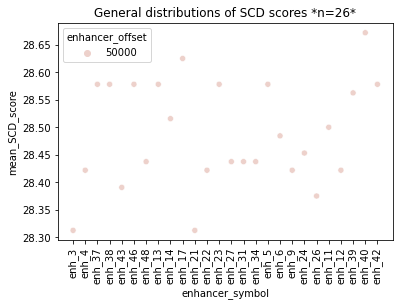

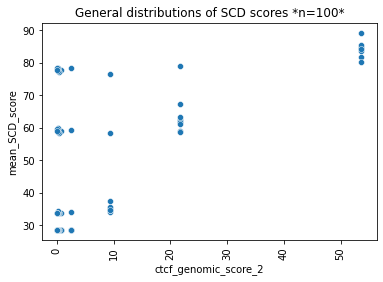

In [5]:
data=enhancers_alone_df.loc[True==(enhancers_alone_df["enhancer_num_of_motifs"]==0)]
sns.scatterplot(data=data, y="mean_SCD_score", x="enhancer_symbol", hue="enhancer_offset") 
plt.title(f"General distributions of SCD scores *n={data.shape[0]}*")
plt.xticks(rotation=90)
plt.show()


# data=enhancers_alone_df.loc[True==(enhancers_alone_df["enhancer_num_of_motifs"]>=0)]
# sns.scatterplot(data=data, y="mean_SCD_score", x="H3K27Ac_signal", hue="enhancer_offset") 
# plt.title(f"General distributions of SCD scores *n={data.shape[0]}*")
# plt.show()

# data=enhancers_alone_df.loc[True==(enhancers_alone_df["enhancer_num_of_motifs"]>=0)]
# sns.scatterplot(data=data, y="mean_SCD_score", x="NIPBL_signal", hue="enhancer_offset") 
# plt.title(f"General distributions of SCD scores *n={data.shape[0]}*")
# plt.show()

# data=enhancers_alone_df.loc[True==(enhancers_alone_df["enhancer_num_of_motifs"]>=0)]
# sns.scatterplot(data=data, y="H3K27Ac_signal", x="NIPBL_signal", hue="enhancer_offset") 
# plt.title(f"General distributions of SCD scores *n={data.shape[0]}*")
# plt.show()



# data=promoters_alone_df.loc[True==(promoters_alone_df["promoter_num_of_motifs"]==0)]
# # data= data.loc[True==(data["mean_SCD_score"]>=40)]
# sns.boxplot(data=data, y="mean_SCD_score", x="gene_symbol") # , hue="gene_offset" 
# plt.title(f"General distributions of SCD scores *n={data.shape[0]}*")
# plt.xticks(rotation=90)
# plt.show()



# data=promoter_enhancer_df
# data=data.loc[True==(data["promoter_num_of_motifs"]==0)]
# data=data.loc[True==(data["enhancer_num_of_motifs"]==0)]
# # data= data.loc[True==(data["mean_SCD_score"]>=40)]
# sns.boxplot(data=data, y="mean_SCD_score", x="gene_symbol") # , hue="gene_offset" 
# plt.title(f"General distributions of SCD scores *n={data.shape[0]}*")
# plt.xticks(rotation=90)
# plt.show()



data=ctcfs_alone_df
# data = data.loc[True==(data["ctcf_genomic_score_2"]==data["ctcf_genomic_score_1"])]
sns.scatterplot(data=data, y="mean_SCD_score", x="ctcf_genomic_score_2") 
plt.title(f"General distributions of SCD scores *n={data.shape[0]}*")
plt.xticks(rotation=90)
plt.show()

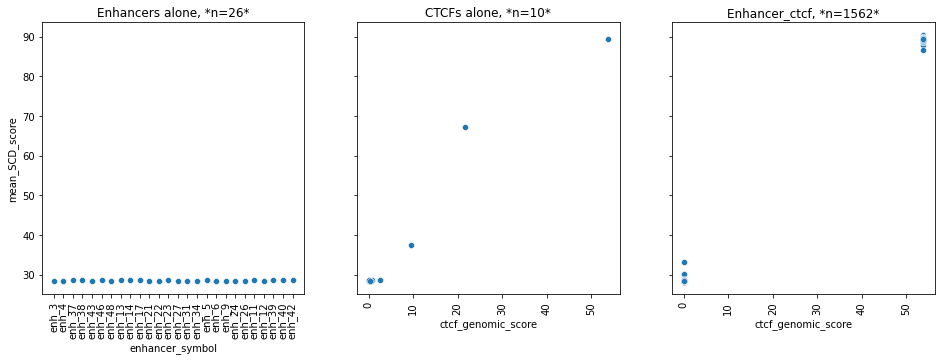

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 5))

# Boxplot of mean_SCD_score for each value of ctcf_genomic_score_2 in ctcfs_alone_df
data = ctcfs_alone_df
# data = ctcfs_alone_df.loc[True==(ctcfs_alone_df["ctcf_genomic_score_1"]<=20)]
data = ctcfs_alone_df.loc[True==(ctcfs_alone_df["ctcf_genomic_score_1"]==ctcfs_alone_df["ctcf_genomic_score_2"])]
sns.scatterplot(data=data, y="mean_SCD_score", x="ctcf_genomic_score_2", ax=ax2)
ax2.set_title(f"CTCFs alone, *n={data.shape[0]}*")
ax2.set_xlabel("ctcf_genomic_score")
ax2.set_ylabel("mean_SCD_score")
ax2.tick_params(axis='x', rotation=90)

# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_alone_df
data = enhancers_alone_df.loc[True==(enhancers_alone_df["enhancer_num_of_motifs"]==0)]
# data = boundary_enhancer_df.loc[True==(boundary_enhancer_df["enhancer_num_of_motifs"]==0)]
sns.scatterplot(data=data, y="mean_SCD_score", x="enhancer_symbol", ax=ax1) #  hue="enhancer_offset",
ax1.set_title(f"Enhancers alone, *n={data.shape[0]}*")
ax1.set_xlabel("enhancer_symbol")
ax1.set_ylabel("mean_SCD_score")
ax1.tick_params(axis='x', rotation=90)

# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_alone_df
data = boundary_enhancer_df.loc[True==(boundary_enhancer_df["enhancer_num_of_motifs"]==0)]
data = boundary_enhancer_df.loc[True==(boundary_enhancer_df["ctcf_genomic_score_1"]==boundary_enhancer_df["ctcf_genomic_score_2"])]
sns.scatterplot(data=data, y="mean_SCD_score", x="ctcf_genomic_score_2", ax=ax3) #  hue="enhancer_offset",
ax3.set_title(f"Enhancer_ctcf, *n={data.shape[0]}*")
ax3.set_xlabel("ctcf_genomic_score")
ax3.set_ylabel("")
ax3.tick_params(axis='x', rotation=90)

# Display the figure
plt.show()

# Create a figure with two subplots
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(16, 5))

# # Boxplot of mean_SCD_score for each value of ctcf_genomic_score_2 in ctcfs_alone_df
# data = ctcfs_alone_df
# data = ctcfs_alone_df.loc[True==(ctcfs_alone_df["ctcf_genomic_score_1"]>=20)]
# sns.scatterplot(data=data, y="mean_SCD_score", x="ctcf_genomic_score_2", ax=ax2)
# ax2.set_title(f"CTCFs alone, *n={data.shape[0]}*")
# ax2.set_xlabel("ctcf_genomic_score_2")
# ax2.set_ylabel("mean_SCD_score")
# ax2.tick_params(axis='x', rotation=90)

# # Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_alone_df
# data = enhancers_alone_df.loc[True==(enhancers_alone_df["enhancer_num_of_motifs"]==0)]
# sns.scatterplot(data=data, y="mean_SCD_score", x="enhancer_symbol", ax=ax1) #  hue="enhancer_offset",
# ax1.set_title(f"Enhancers alone, *n={data.shape[0]}*")
# ax1.set_xlabel("enhancer_symbol")
# ax1.set_ylabel("mean_SCD_score")
# ax1.tick_params(axis='x', rotation=90)

# # Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_ctcf_df
# data = boundary_enhancer_df.loc[True==(boundary_enhancer_df["enhancer_num_of_motifs"]==0)]
# data = boundary_enhancer_df.loc[True==(boundary_enhancer_df["ctcf_genomic_score_1"]>=20)]
# sns.scatterplot(data=data, y="mean_SCD_score", x="ctcf_genomic_score_2", ax=ax3) #  hue="enhancer_offset",
# ax3.set_title(f"Enhancer_ctcf, *n={data.shape[0]}*")
# ax3.set_xlabel("ctcf_genomic_score_2")
# ax3.set_ylabel("mean_SCD_score")
# ax3.tick_params(axis='x', rotation=90)

# # Display the figure
# plt.show()

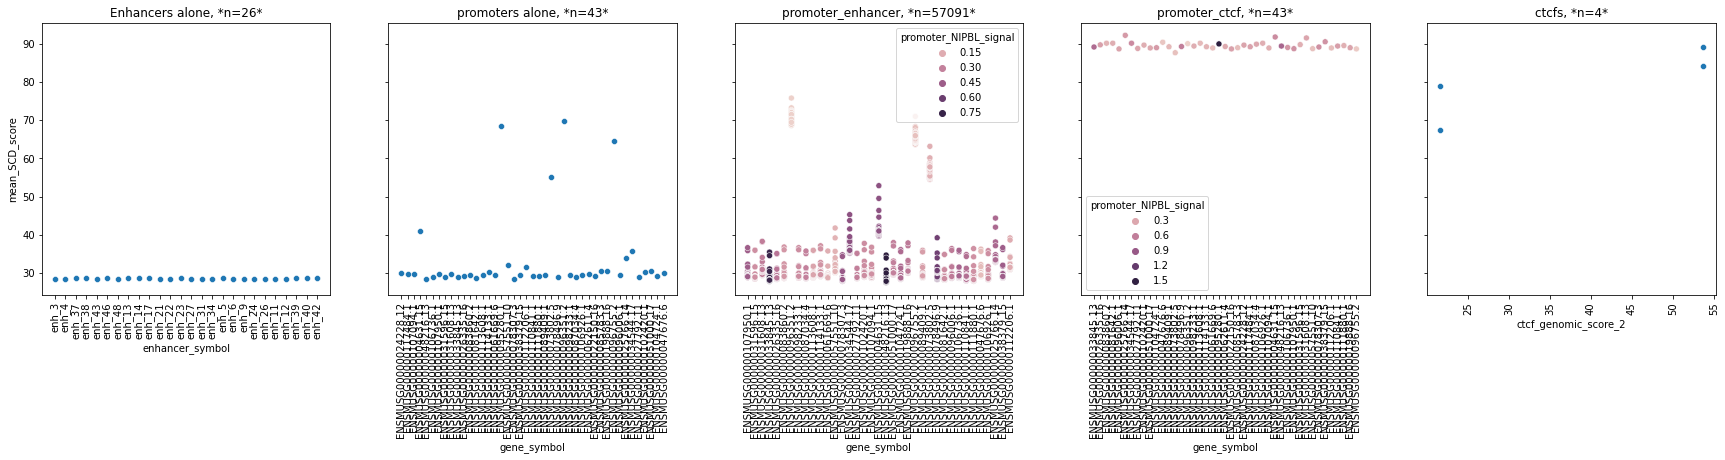

In [22]:
# Create a figure with two subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5,sharey=True, figsize=(30, 5)) #  

# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_alone_df
data = enhancers_alone_df.loc[True==(enhancers_alone_df["enhancer_num_of_motifs"]==0)]
sns.scatterplot(data=data, y="mean_SCD_score", x="enhancer_symbol", ax=ax1) #  hue="enhancer_offset",
ax1.set_title(f"Enhancers alone, *n={data.shape[0]}*")
ax1.set_xlabel("enhancer_symbol")
ax1.set_ylabel("mean_SCD_score")
ax1.tick_params(axis='x', rotation=90)

# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_alone_df
data = promoters_alone_df.loc[True==(promoters_alone_df["promoter_num_of_motifs"]==0)]
sns.scatterplot(data=data, y="mean_SCD_score", x="gene_symbol", ax=ax2) #  hue="enhancer_offset",
ax2.set_title(f"promoters alone, *n={data.shape[0]}*")
ax2.set_xlabel("gene_symbol")
ax2.set_ylabel("mean_SCD_score")
ax2.tick_params(axis='x', rotation=90)

# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_ctcf_df
data = promoter_enhancer_df.loc[True==(promoter_enhancer_df["enhancer_num_of_motifs"]==0)]
data = data.loc[True==(data["promoter_num_of_motifs"]==0)]

# data = data.loc[True==(data["gene_offset"]==-100000)]
# data = data.loc[True == ("ENSMUSG00000096351.2" == data["gene_symbol"])]
sns.scatterplot(data=data, y="mean_SCD_score", x="gene_symbol",hue="promoter_NIPBL_signal", ax=ax3) #  
ax3.set_title(f"promoter_enhancer, *n={data.shape[0]}*")
# ax3.set_xlabel("gene_symbol")
# ax3.set_ylabel("mean_SCD_score")
ax3.tick_params(axis='x', rotation=90)

# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_ctcf_df
data = boundary_promoter_df.loc[True==(boundary_promoter_df["promoter_num_of_motifs"]==0)]
data = data.loc[True==(data["promoter_num_of_motifs"]==0)]
data = data.loc[True==(data["ctcf_genomic_score_2"]>=20)]
data = data.loc[True==(data["ctcf_genomic_score_1"]>=20)]
# data = data.loc[True==(data["gene_offset"]==-100000)]
# data = data.loc[True == ("ENSMUSG00000096351.2" == data["gene_symbol"])]
sns.scatterplot(data=data, y="mean_SCD_score", x="gene_symbol",hue="promoter_NIPBL_signal", ax=ax4) #  
ax4.set_title(f"promoter_ctcf, *n={data.shape[0]}*")
# ax3.set_xlabel("gene_symbol")
# ax3.set_ylabel("mean_SCD_score")
ax4.tick_params(axis='x', rotation=90)


# Scatter plot of mean_SCD_score for each value of enhancer_symbol in enhancers_ctcf_df
data = ctcfs_alone_df
data = data.loc[True==(data["ctcf_genomic_score_2"]>=20)]
data = data.loc[True==(data["ctcf_genomic_score_1"]>=20)]
sns.scatterplot(data=data, y="mean_SCD_score", x="ctcf_genomic_score_2", ax=ax5) #  
ax5.set_title(f"ctcfs, *n={data.shape[0]}*")
# ax3.set_xlabel("gene_symbol")
# ax3.set_ylabel("mean_SCD_score")
ax5.tick_params(axis='x', rotation=90)

# Display the figure
plt.show()